<a href="https://colab.research.google.com/github/Arthur2303/Circuitos-Eletricos-I/blob/main/CE_ListaQuest%C3%A3o2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import sys
!git clone https://github.com/edsonportosilva/ElectricCircuits.git
sys.path.insert(0, '/content/ElectricCircuits/Jupyter notebooks/')

fatal: destination path 'ElectricCircuits' already exists and is not an empty directory.


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from utils import round_expr, symdisp, symplot

from sympy.polys.partfrac import apart

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)

sp.init_printing()

#### Definindo algumas variáveis simbólicas de interesse

In [84]:
s     = sp.symbols('s')
a     = sp.symbols('a', real=True, positive=True)
omega, t = sp.symbols('omega, t', real=True)
infty = sp.oo

### b. Para a fonte de $\frac{10}{s}$ $Vs$:

In [110]:
VA1, I1, I_l1, I_c1, V_c1,s = sp.symbols('VA_1, I1, I_L1, I_C1, V_c1, s')

# define os sistema de equações
eq1 = sp.Eq( VA1/(2+s*0.5) + (VA1- 10/s)/(1/(0.00025*s)) , (-VA1 /(s*0.5)) )             

# resolve o sistema
soluc = sp.solve(eq1, VA1, dict=True)
soluc

VA1 = [sol[VA1] for sol in soluc]

VA1 = VA1[0]
I1 = -VA1 /(s*0.5)
I_l1 = VA1/(2+s*0.5)
I_c1 = (VA1 - 10/s)/(1/(0.00025*s))

print('Tensões dos nós no domínio de Laplace: \n')
symdisp('VA_{1}(s) =', VA1.simplify(), 'Vs')
print("\n")
symdisp('I1(s) =', I1.simplify(), 'As')
print("\n")
symdisp('I_{L1}(s) =', I_l1.simplify(), 'As')
print("\n")
symdisp('I_{C1}(s) =', I_c1.simplify(), 'As')

Tensões dos nós no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [112]:
# Determinando a tensão no capacitor e correntes no indutor L.
V_c1 = (1/(0.00025*s))*I_c1
I_l1 = I_l1

symdisp("Vc_1 = ", round_expr(V_c1.simplify(),2),"Vs")
print("\n")
symdisp("I_{l1} = ", round_expr(I_l1.simplify(),2),"As")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [113]:
vc_0_tvi = sp.limit(s*V_c1, s, infty)
i1_0_tvi = sp.limit(s*I_l1, s, infty)

print('TVI')
symdisp('vc_0(0^+) = ', vc_0_tvi, ' V' )
symdisp('i_{L0}(0^+) = ', i1_0_tvi, ' A' )

vc_0_tvf = sp.limit(s*V_c1, s, 0)
i1_inf_tvf = sp.limit(s*I_l1, s, 0)

print('TVF')
symdisp('vc_0(+\infty) = ', vc_0_tvf, ' V' )
symdisp('i_{Lf}(+\infty) = ', i1_inf_tvf, ' A' )

TVI


<IPython.core.display.Math object>

<IPython.core.display.Math object>

TVF


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### b. Para a fonte de $\frac{20}{s}$ $Vs$:

In [147]:
VA2, I, I_l, I_c, Vc_2,s = sp.symbols('VA_2, I, I_l, I_c, Vc_2, s')

# define os sistema de equações
eq1 = sp.Eq( VA2/(2+(s*0.5)) + VA2/(1/(0.00025*s)) , (((20/s)-VA2) /(s*0.5)) )             

# resolve o sistema
soluc = sp.solve(eq1, VA2, dict=True)
soluc

VA2 = [sol[VA2] for sol in soluc]

VA2 = VA2[0]
I = ((20/s) -VA2) /(s*0.5)
I_l = VA2/(2+s*0.5)
I_c = VA2/(1/(0.00025*s))

print('Tensões dos nós no domínio de Laplace: \n')
symdisp('VA_2(s) =', VA2.simplify(), 'Vs')
print("\n")
symdisp('I(s) =', I.simplify(), 'As')
print("\n")
symdisp('I_l(s) =', I_l.simplify(), 'As')
print("\n")
symdisp('I_c(s) =', I_c.simplify(), 'As')

Tensões dos nós no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [148]:
# Determinando a tensão no capacitor e corrente no indutor L.
Vc_2 = (1/(0.00025*s))*I_c
I_l = I_l

symdisp("Vc_2 = ", round_expr(Vc_2.simplify(),2),"Vs")
print("\n")
symdisp("I_l = ", round_expr(I_l.simplify(),2),"As")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [149]:
# Fonte de 20/s 
vc_0_tvi = sp.limit(s*Vc_2, s, infty)
i1_0_tvi = sp.limit(s*I_l, s, infty)

print('TVI')
symdisp('vc_0(0^+) = ', vc_0_tvi, ' V' )
symdisp('i_{L0}(0^+) = ', i1_0_tvi, ' A' )

vc_0_tvf = sp.limit(s*Vc_2, s, 0)
i1_inf_tvf = sp.limit(s*I_l, s, 0)

print('TVF')
symdisp('vc_0(+\infty) = ', vc_0_tvf, ' V' )
symdisp('i_{Lf}(+\infty) = ', i1_inf_tvf, ' A' )

TVI


<IPython.core.display.Math object>

<IPython.core.display.Math object>

TVF


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Contribuição Final**

In [220]:
# Determinando a contribuição final da tensões Vc e correntes IL
VC, IL, s = sp.symbols('V_C, I_L, s')

V_c1 = round_expr(V_c1.simplify(),2)
Vc_2 = round_expr(Vc_2.simplify(),2)

VC = (V_c1 + Vc_2).expand().simplify()
IL = (I_l + I_l1).expand().simplify()

symdisp("V_C = ", VC,"Vs")
symdisp("I_L = ", round_expr(IL.simplify(),2),"As")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**TVI e TVF contribuição final**

In [213]:
symdisp('V_C(s) = ', round_expr(VC.simplify(),2) , ' Vs' )

vc_0_tvi = sp.limit(s*VC, s, infty)
i1_0_tvi = sp.limit(s*IL, s, infty)

print('TVI')
symdisp('vc_0(0^+) = ', vc_0_tvi, ' V' )
symdisp('i_{L0}(0^+) = ', i1_0_tvi, ' A' )

vc_0_tvf = sp.limit(s*VC, s, 0)
i1_inf_tvf = sp.limit(s*IL, s, 0)

print('TVF')
symdisp('vc_0(+\infty) = ', vc_0_tvf, ' V' )
symdisp('i_{Lf}(+\infty) = ', i1_inf_tvf, ' A' )

<IPython.core.display.Math object>

TVI


<IPython.core.display.Math object>

<IPython.core.display.Math object>

TVF


<IPython.core.display.Math object>

<IPython.core.display.Math object>

C. Determina $i_L(t)$ e $v_C(t)$:

In [153]:
# Tirando as raízes do D(s)
np.roots([1, 4, 16000, 32000, 0])

array([-0.99974994+126.47134261j, -0.99974994-126.47134261j,
       -2.00050012  +0.j        ,  0.          +0.j        ])

In [171]:
# Dados colocados foram encontrados a partir da expansão em frações parciais e inversas feitas à mão.

i_l = (10 - 10*sp.exp(-2*t) + 2*sp.exp(-0.99975*t)*( 0.00128*sp.cos(126.4713*t) + 0.0002*sp.sin(126.4713*t)))*sp.Heaviside(t)

symdisp('i_L(t) = ', i_l, 'A')

<IPython.core.display.Math object>

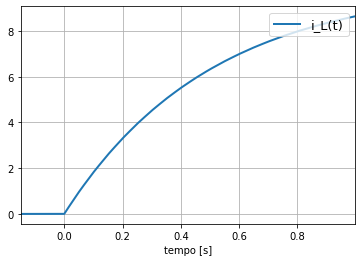

In [168]:
# plota funções no domínio do tempo
# plot IL
intervalo = np.arange(-0.15, 1, 0.0005)
symplot(t, i_l, intervalo, 'i_L(t)')

In [222]:
v_c = (10 - 10*sp.exp(-2*t) + 2*sp.exp(-0.9997*t)*( -0.0000037518*sp.cos(126.4713*t) + 0.07908*sp.sin(126.4713*t)))*sp.Heaviside(t)

symdisp('v_C(t) = ', v_c, 'V')

<IPython.core.display.Math object>

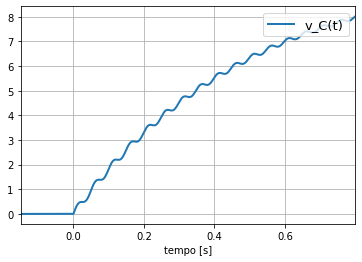

In [223]:
# plota funções no domínio do tempo
# plot Vc(t)
intervalo = np.arange(-0.15, 0.8, 0.00005)
symplot(t, v_c, intervalo, 'v_C(t)')

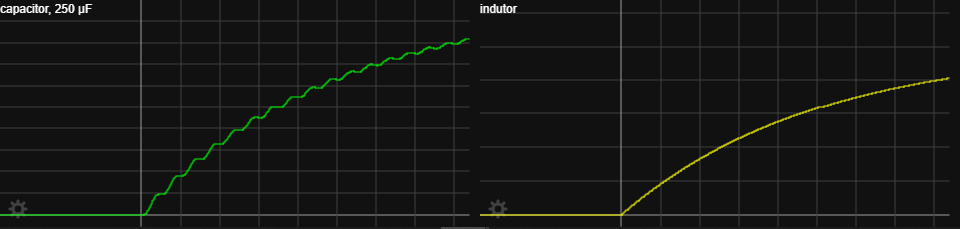